<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/Client-Segment-with-Bank-Data/blob/main/Segmentacion_clientes_bancarios_JohanSantanaGalvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Santana Galván

   Columnas:
   # bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  
  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Importación de los datos
link = 'https://raw.githubusercontent.com/JohanSantanaGalvanJob/Client-Segment-with-Bank-Data/main/bank.csv'

df_clients = pd.read_csv(link, sep=';')
columns =df_clients.columns.values

In [ ]:
df_clients

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
columns

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [2]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
null_values = df_clients.isnull().sum()
null_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
for columna in df_clients.columns:
    num_valores_unicos = df_clients[columna].nunique()
    print(f'Número de valores únicos en la columna {columna}: {num_valores_unicos}')

Número de valores únicos en la columna age: 67
Número de valores únicos en la columna job: 12
Número de valores únicos en la columna marital: 3
Número de valores únicos en la columna education: 4
Número de valores únicos en la columna default: 2
Número de valores únicos en la columna balance: 2353
Número de valores únicos en la columna housing: 2
Número de valores únicos en la columna loan: 2
Número de valores únicos en la columna contact: 3
Número de valores únicos en la columna day: 31
Número de valores únicos en la columna month: 12
Número de valores únicos en la columna duration: 875
Número de valores únicos en la columna campaign: 32
Número de valores únicos en la columna pdays: 292
Número de valores únicos en la columna previous: 24
Número de valores únicos en la columna poutcome: 4
Número de valores únicos en la columna y: 2


In [5]:
# Elimino las columnas que considero no son interesantes para realizar el clustering
# ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day', 'month', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'y']
# No voy a continuar con las siguientes columnas: 'day', 'month', 'default', 'previous', 'pdays'
columns_selected = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',  'duration','campaign', 'poutcome', 'y']

df_clients = df_clients[columns_selected]
df_clients

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,79,1,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,220,1,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,185,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,199,4,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,226,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,329,5,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,153,1,unknown,no
4518,57,technician,married,secondary,295,no,no,cellular,151,11,unknown,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,129,4,other,no


In [6]:
# Conversión de variables catgóricas a numéricas
le = LabelEncoder()

pd.options.mode.copy_on_write = True # Para que no muestre el warning

df_clients['job'] = le.fit_transform(df_clients['job'])
df_clients['marital'] = le.fit_transform(df_clients['marital'])
df_clients['education'] = le.fit_transform(df_clients['education'])
#df_clients['default'] = le.fit_transform(df_clients['default'])
df_clients['housing'] = le.fit_transform(df_clients['housing'])
df_clients['loan'] = le.fit_transform(df_clients['loan'])
df_clients['contact'] = le.fit_transform(df_clients['contact'])
df_clients['poutcome'] = le.fit_transform(df_clients['marital'])
df_clients['y'] = le.fit_transform(df_clients['y'])


In [7]:
df_clients

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,30,10,1,0,1787,0,0,0,79,1,1,0
1,33,7,1,1,4789,1,1,0,220,1,1,0
2,35,4,2,2,1350,1,0,0,185,1,2,0
3,30,4,1,2,1476,1,1,2,199,4,1,0
4,59,1,1,1,0,1,0,2,226,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,-333,1,0,0,329,5,1,0
4517,57,6,1,2,-3313,1,1,2,153,1,1,0
4518,57,9,1,1,295,0,0,0,151,11,1,0
4519,28,1,1,1,1137,0,0,0,129,4,1,0


## Transformación de los datos



In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
clients_scaled = min_max_scaler.fit_transform(df_clients)
clients_scaled

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.5       ,
        0.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.        , 0.5       ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.55882353, 0.81818182, 0.5       , ..., 0.20408163, 0.5       ,
        0.        ],
       [0.13235294, 0.09090909, 0.5       , ..., 0.06122449, 0.5       ,
        0.        ],
       [0.36764706, 0.18181818, 1.        , ..., 0.02040816, 1.        ,
        0.        ]])

Tenemos que ser conscientes de que *clients_scaled* es ahora una matriz de numpy, que no es la misma *estructura de datos* que *df_clients* (que es un dataframe).

Antes de realizar el clustering sería recomendable seleccionar aquellas variables que nos parezcan más significativas para el problema.  Esto es recomendable incluso antes de realizar el procesamiento de los datos, pero esto sólo es posible si conocemos bien el problema de antemano.

Si no conocemos el problema, podemos estudiar cómo se distribuyen esos datos una vez han sido cargados, como por ejemplo, ver la correlación entre variables y/o realizar un **análisis de componentes principales (PCA)** , con el objetyivo de detectar si hay algún patrón que nos pueda ayudar a tomar una determinada estrategia, a continuación obtener una proyección 2D de los datos que podamos visualizar y poder así tomar una decisión al respecto.

In [9]:
from sklearn.decomposition import PCA
import numpy as np

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(clients_scaled)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=df_clients.columns)

[0.27000771 0.18184396]


,PC-1,PC-2
age,0.031087,0.162141
job,0.118954,-0.047434
marital,0.094010,-0.567320
education,0.085089,-0.086191
balance,0.003955,-0.000325
housing,-0.811848,-0.403532
loan,-0.032781,0.074745
contact,-0.529900,0.388093
duration,0.004340,-0.005503
campaign,-0.000965,0.000674


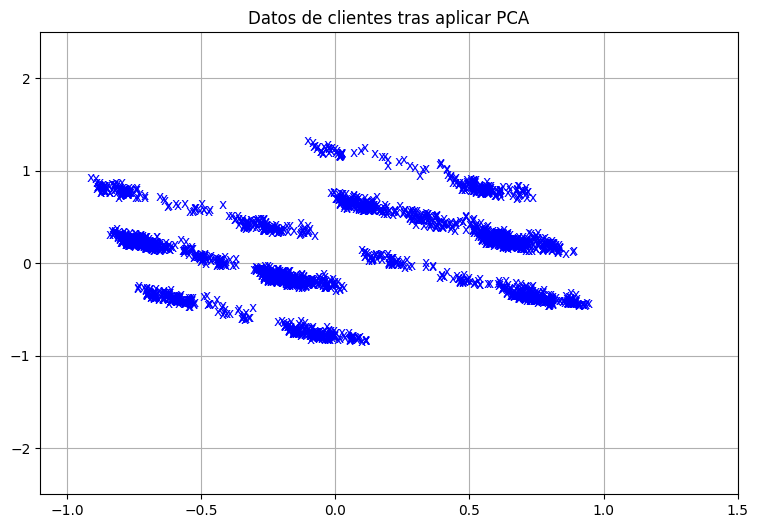

In [10]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")
plt.xlim(-1.1, 1.5)
plt.ylim(-2.5, 2.5)
plt.title("Datos de clientes tras aplicar PCA")
plt.grid()
plt.show()

# Silhouette Coefficient

Vamos a aplicar el Silhouette coefficient como otra forma de saber cuántos clusters deberemos crear para nuestro conjunto de datos. El siguiente bloque de código debe ejecutarse si queremos aplicar esta estrategis SIN PCA. Ignorar en caso de que queramos aplicar PCA.

In [11]:
# Determinar el número de clusters para ello se realiza un análisis de siluetas de los posibles grupos/clusters

# Título: sklearn.metrics.silhouette_score
# Url: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Establemecemos un límite para realizar una prospección del coeficiente de Silueta (silhouette score)
limit = 10

for k in range(2, limit + 1):
    model = KMeans(n_clusters = k, n_init='auto', random_state=10)
    model.fit(clients_scaled)
    pred = model.predict(clients_scaled)
    score = silhouette_score(clients_scaled, pred)

    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

# Cuanto más alto es el score mejor agrupamiento cluster obtendremos

Silhouette Score for k = 2: 0.220
Silhouette Score for k = 3: 0.259
Silhouette Score for k = 4: 0.234
Silhouette Score for k = 5: 0.245
Silhouette Score for k = 6: 0.252
Silhouette Score for k = 7: 0.270
Silhouette Score for k = 8: 0.252
Silhouette Score for k = 9: 0.268
Silhouette Score for k = 10: 0.289


For n_clusters = 2 The average silhouette_score is : 0.5017584605970437
For n_clusters = 3 The average silhouette_score is : 0.5097160051799479
For n_clusters = 4 The average silhouette_score is : 0.5379569864043272
For n_clusters = 5 The average silhouette_score is : 0.5864327054537776
For n_clusters = 6 The average silhouette_score is : 0.630328425181976


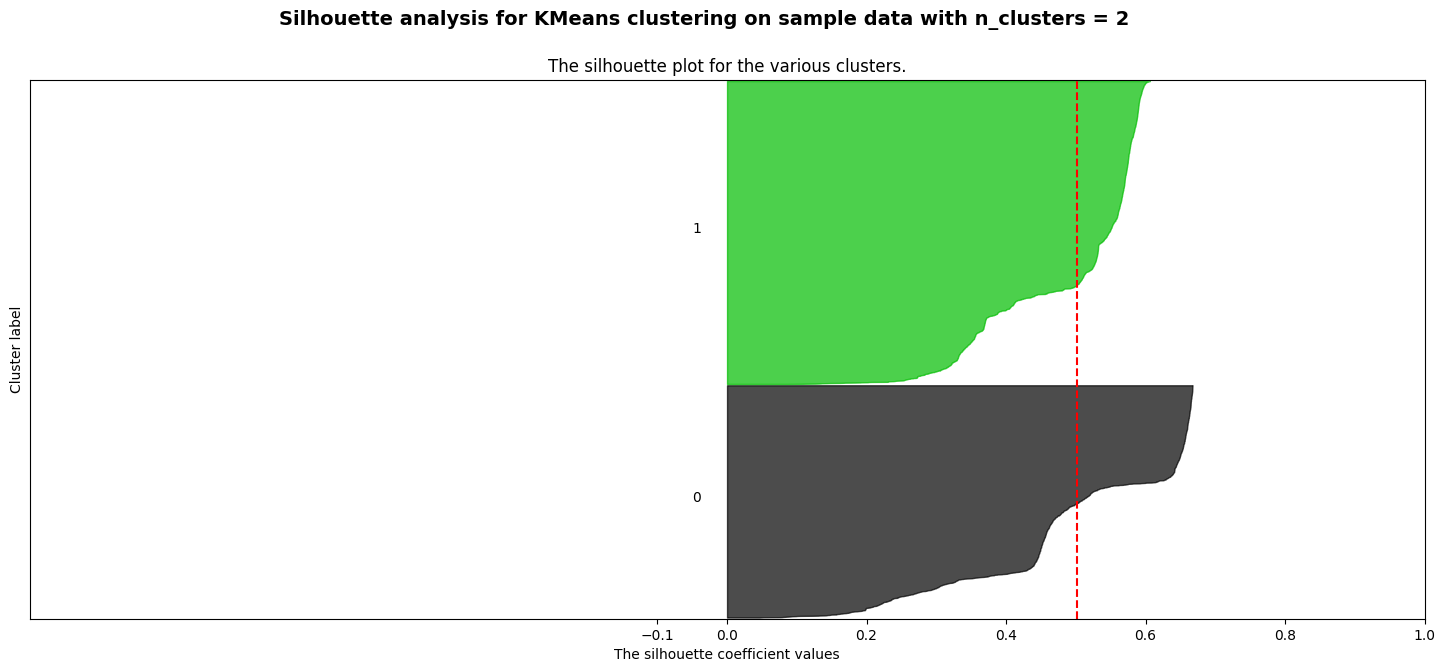

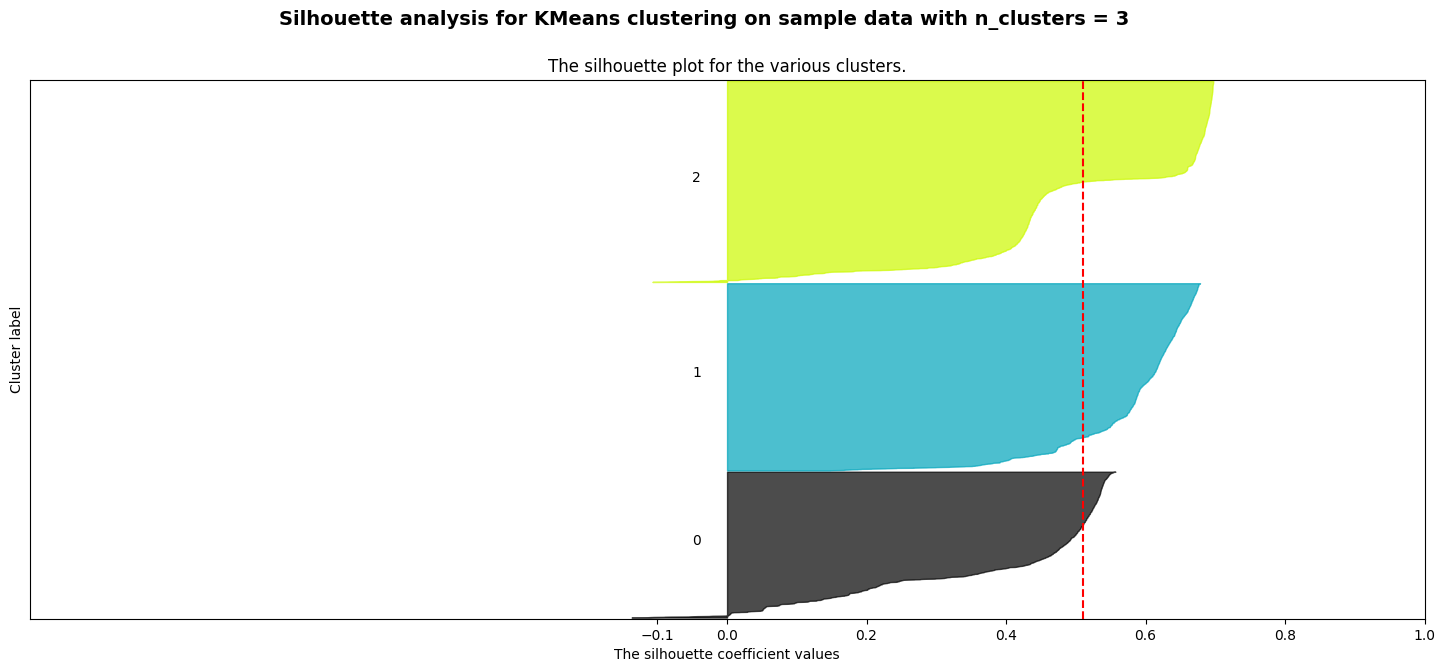

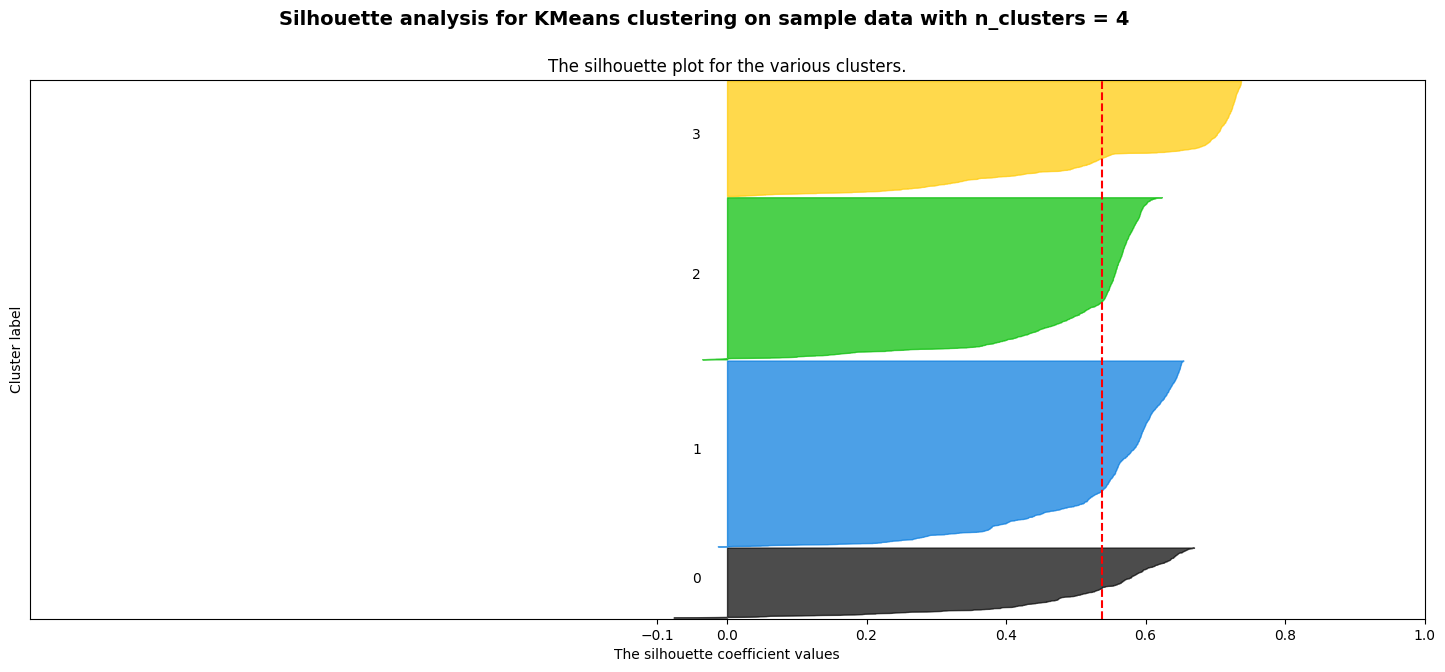

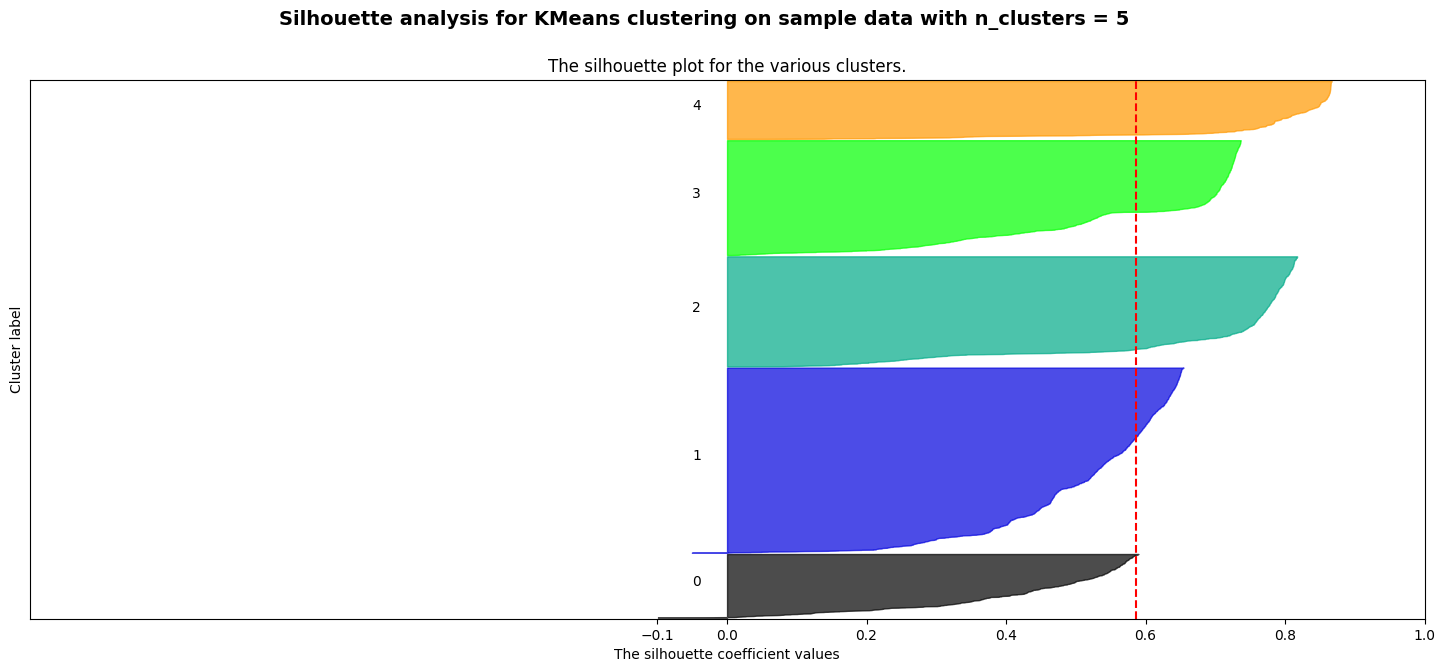

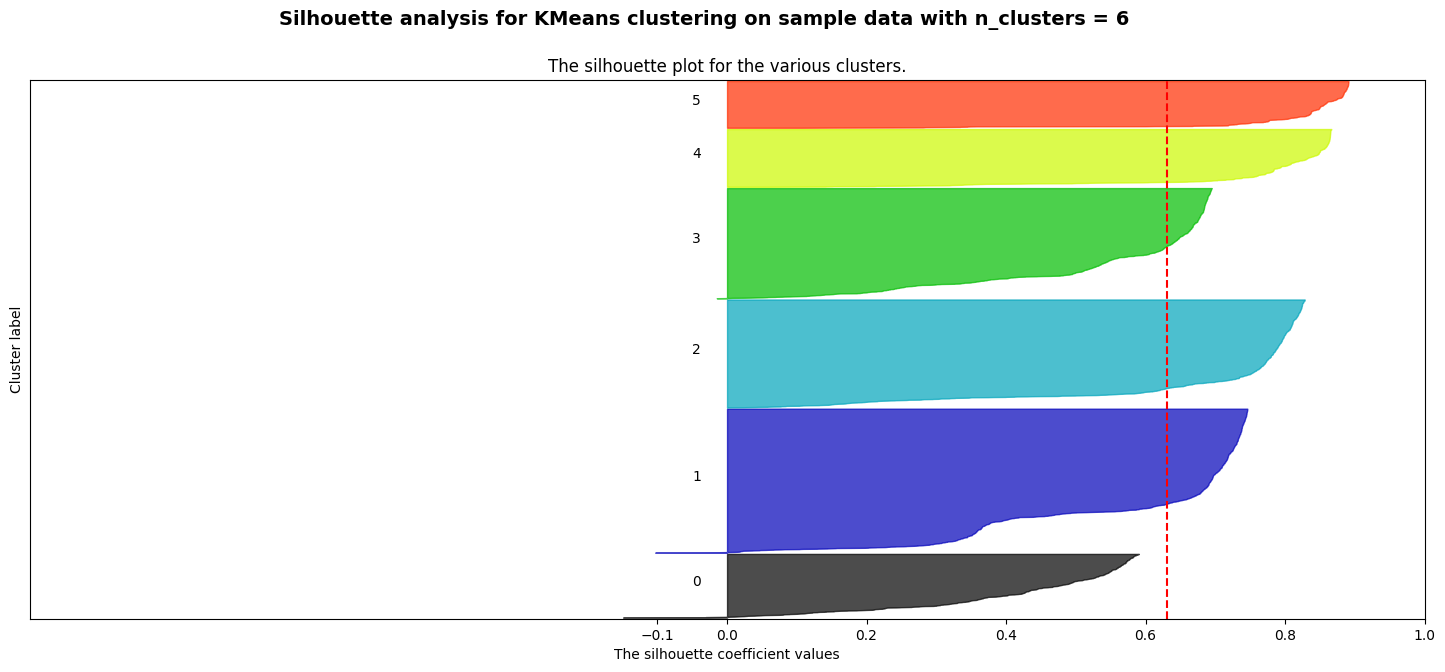

In [12]:
# Veamos la representación gráfica de los grupos (clusters)
# y utilizar las librerías  silhouette_samples, silhouette_score

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
X = X_pca

range_n_clusters = [2, 3, 4, 5, 6] # En este ejemplo determinaos el númnero de clusters a probar de forma manual.

for n_clusters in range_n_clusters:
    # Crea una subparcela con 1 fila y 2 columnas
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # La primera subtrama es la trama de silueta
    # El coeficiente de silueta puede oscilar entre -1, 1
    ax1.set_xlim([-1, 1])
    # El (n_clusters + 1) * 10 es para insertar un espacio en blanco entre la silueta
    # parcelas de conglomerados individuales, para demarcarlas claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicialice el clusterer con el valor n_clusters y un generador aleatorio
    # semilla de 10 para reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette_score da el valor promedio de todas las muestras.
    # Esto da una perspectiva de la densidad y separación de la forma
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calcule las puntuaciones de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


    y_lower = 10
    for i in range(n_clusters):
        # Agregue las puntuaciones de silueta para muestras pertenecientes a
        # agrupe i, y ordénelos
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquete las parcelas de silueta con sus números de grupo en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcule el nuevo y_lower para la siguiente parcela
        y_lower = y_upper + 10  # 10 para las 0 muestras

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # La línea vertical para la puntuación de silueta promedio de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Borrar las etiquetas / ticks de yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Ejecución del algoritmo de clustering jerárquico

A continuación, vamos a ejecutar un algoritmo de clustering jerárquico (notar que tardará un rato en ejecutarse) para ver cómo se distribuyen los datos.

Dado que la mayor parte de los datos no están muy concentrados y el resto parecen valores atípicos, es mejor utilizar como distancia intercluster el **vecino más próximo** (single). Las opciones más recomendadas para este problema van desde el **vecino más alejado** (complete) hasta la **mínima varianza** (ward).

Utilizaremos como distancia el vecino más cercano (single) ya que nos permitirá dividir los grupos más grandes. Se establece un umbral (threshold) de $15$ como distancia a partir de la cual se considerará que los grupos a distancia mayor son grupos independientes (y por lo tanto no se agruparan).


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


Distancia Media	   1.39


<ipython-input-13-5502f6c20447>:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='single')


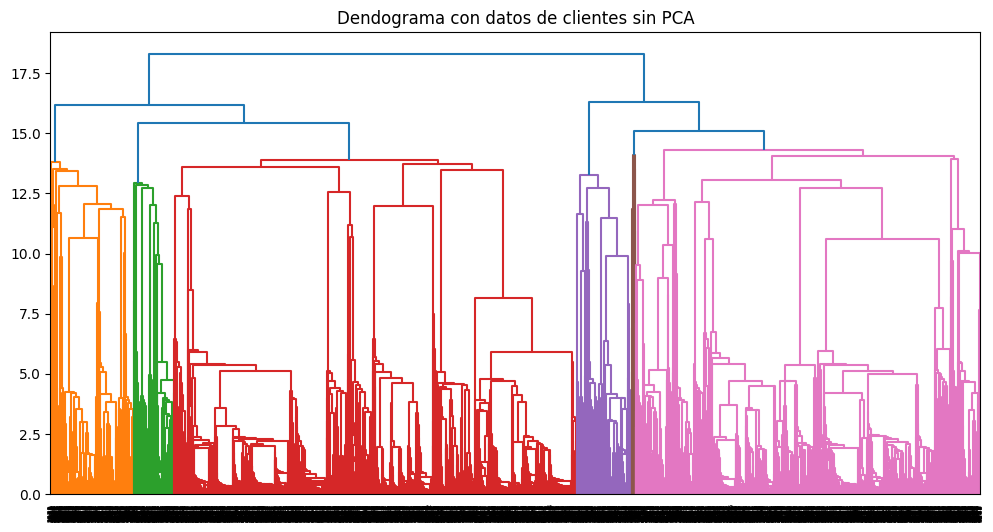

In [13]:
## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(clients_scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma
from scipy import cluster
plt.figure(figsize=(12, 6))
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
# lusters = cluster.hierarchy.linkage(D, method='complete')
clusters = cluster.hierarchy.linkage(D, method='single')
# Cada fila del array clusters representa una fusión específica, indicando
#              * Qué clusters se combinaron (Columna1 y Columna2)
#              * La distancia entre ellos en el momento de su fusión
#              * El tamaño del nuevo cluster resultante.
cluster.hierarchy.dendrogram(clusters, color_threshold=15)
plt.title("Dendograma con datos de clientes sin PCA")
plt.show()

# Para más información consultar:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Tras realizar el corte a una distancia de $15$ utilizando distancia intercluster el vecino más alejado (complete), obtenemos $7$ grupos. Este nivel de corte debe realizarse ad-hoc en un nível que consideremos lógico. En este caso concreto, vemos que realizar este corte nos da unos cuantos outiliers (grupos de un solo elemento).

A continuación vamos a obtener un vector (*labels*) que, dada una distancia de corte (*threshold*) y un criterio de distancia intercluster, contenga el grupo al que pertece cada elemento.

In [14]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 15 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 6


array([6, 1, 3, ..., 6, 6, 1], dtype=int32)

Ahora podemos volver a representar gráficamente los datos del PCA (en dos dimensiones) pero introduciendo como color los resultados de las etiquetas. Se puede ver que el clustering no ha quedado nada mal, los resultados son coherentes.

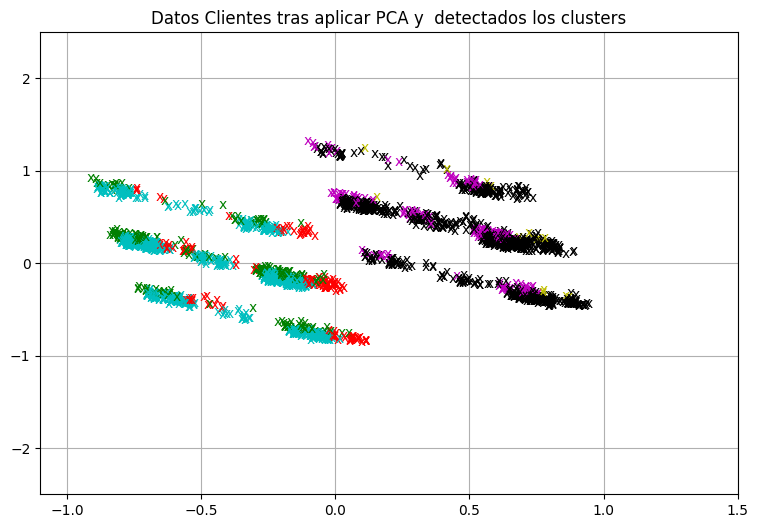

In [15]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i]])
plt.xlim(-1.1, 1.5)
plt.ylim(-2.5, 2.5)
plt.grid()
plt.title("Datos Clientes tras aplicar PCA y  detectados los clusters")
plt.show()

Vamos a realizar el entrenamiento de nuestro modelo con el número de clusters y aplicando PCA con KMeans

In [16]:
# Fit KMeans
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
clients_scaled = pd.DataFrame(clients_scaled, columns=columns_selected)
clients_scaled['Cluster'] = pred

# Agrupar el DataFrame por cluster y seleccionar los clientes de cada cluster
for cluster_id, group in clients_scaled.groupby('Cluster'):
    print(f"Agrupación de clientes Cluster {cluster_id}:")
    print(group)

Agrupación de clientes Cluster 0:
           age       job  marital  education   balance  housing  loan  \
3     0.161765  0.363636      0.5   0.666667  0.064281      1.0   1.0   
4     0.588235  0.090909      0.5   0.333333  0.044469      1.0   0.0   
8     0.323529  0.181818      0.5   0.666667  0.047436      1.0   0.0   
10    0.294118  0.636364      0.5   0.333333  0.170293      1.0   0.0   
20    0.279412  0.363636      0.0   1.000000  0.044469      1.0   0.0   
...        ...       ...      ...        ...       ...      ...   ...   
4508  0.338235  0.000000      0.5   1.000000  0.053087      1.0   1.0   
4510  0.250000  0.818182      0.0   0.333333  0.052066      1.0   0.0   
4511  0.397059  0.090909      0.5   0.333333  0.053436      1.0   0.0   
4512  0.308824  0.090909      0.5   0.333333  0.059234      1.0   0.0   
4517  0.558824  0.545455      0.5   0.666667  0.000000      1.0   1.0   

      contact  duration  campaign  poutcome    y  Cluster  
3         1.0  0.064548  0.06

Mostramos gráficamente los resultados.

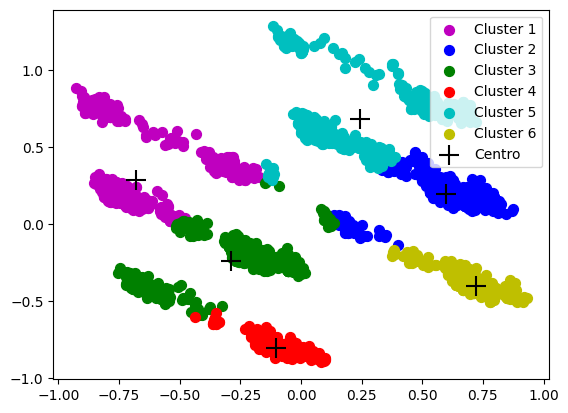

In [18]:
cores = ['m', 'b', 'g', 'r', 'c', 'y']  # Lista con 6 colores diferentes
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s=50, c=cores[i], label='Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='+', c='black', label='Centro')
plt.legend()
plt.show()

Vamos a proceder al pip install para la exportación a excel.

In [19]:
!pip install openpyxl

In [20]:
X_pca_df = pd.DataFrame(X_pca)

In [25]:
X_pca_with_pred.to_excel('datos.xlsx', index=False,engine='openpyxl')